Visualizing effects of L2 regularization and dropout regularization

In [1]:
#import libraries
import numpy as np
from deep_neural_network import DeepNN
import matplotlib.pyplot as plt
import scipy.io



Given dataset is a dataset on France's past 10 football games

In [2]:
#reading the dataset
dataset = scipy.io.loadmat('datasets/data')
train_features,valid_features,train_targets,val_targets = dataset['X'],dataset['Xval'],dataset['y'].astype(float),dataset['yval'].astype(float)

In [3]:
#normalize the features and use the same transformation for validation set features
means = np.mean(train_features,axis = 0).reshape(1,train_features.shape[1])
std = np.std(train_features,axis = 0).reshape(1,train_features.shape[1])
train_features = (train_features - means)/std
valid_features = (valid_features - means)/std

In [4]:
print("Training features shape: " + str(train_features.shape))
print("Validation features shape: " + str(valid_features.shape))

Training features shape: (211, 2)
Validation features shape: (200, 2)


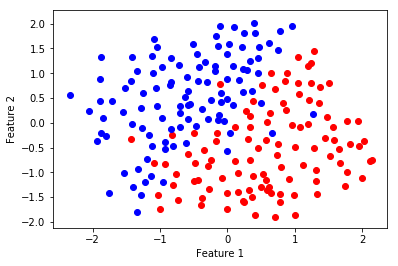

In [5]:
#Plot the trasining
plt.scatter(x = train_features[np.where(train_targets[:,0]==0),0],y = train_features[np.where(train_targets[:,0]==0),1],color = 'red')
plt.scatter(x = train_features[np.where(train_targets[:,0]==1),0],y = train_features[np.where(train_targets[:,0]==1),1],color = 'blue')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

We will first build a non regularized model of 3 layers, i.e, the baseline model

In [6]:
#Initialize the neural network and begin training
iterations = 20000
lr = 0.02
dnn = DeepNN(num_layers=4,units=[train_features.shape[1],20,3,1],activation_fns=['relu','relu','sigmoid'],initialisation='random')
result_dict = dnn.train_NN(train_features,train_targets,iterations,lr,valid_features,val_targets)

Epoch 100
Training Cost: 0.6889579406947232------------Validation cost: 0.689179007225353
Training Accuracy: 0.6729857819905213
Validation Accuracy: 0.67
-----------------------------------------------------------
Epoch 200
Training Cost: 0.6845913268778194------------Validation cost: 0.6846690302644671
Training Accuracy: 0.7109004739336493
Validation Accuracy: 0.71
-----------------------------------------------------------
Epoch 300
Training Cost: 0.6776063167855------------Validation cost: 0.6773705302845272
Training Accuracy: 0.7488151658767772
Validation Accuracy: 0.735
-----------------------------------------------------------
Epoch 400
Training Cost: 0.6651174017428243------------Validation cost: 0.6642775641650609
Training Accuracy: 0.7819905213270142
Validation Accuracy: 0.78
-----------------------------------------------------------
Epoch 500
Training Cost: 0.6425953249996424------------Validation cost: 0.6407030630030204
Training Accuracy: 0.7867298578199052
Validation Acc

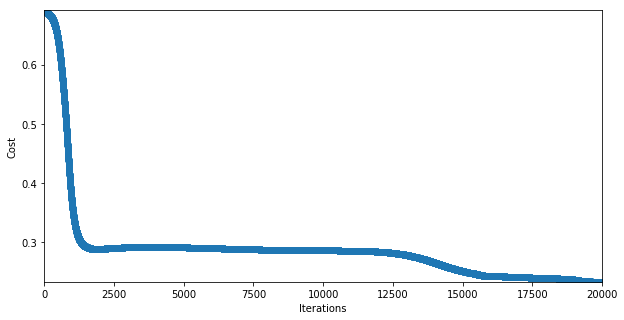

In [7]:
#plotting the cost vs iterations curve
plt.figure(figsize = (10,5))
plt.scatter(x = range(20000),y = result_dict['Training cost'])
plt.ylim(min(result_dict['Training cost']),max(result_dict['Training cost']))
plt.xlim(0,20000)
plt.xlabel("Iterations")
plt.ylabel('Cost')
plt.show()

Validation accuracy is 92 percent. Lets plot the decision boundary of the training set predictions to see whether our model overfits the training set or not

In [4]:
#Now lets see how our model works with regularization and lambda = 0.7
dnn_reg = DeepNN(num_layers=4,units=[train_features.shape[1],20,3,1],activation_fns=['relu','relu','sigmoid'],initialisation='random')
result_dict_reg = dnn_reg.train_NN(train_features,train_targets,20000,0.01,valid_features,val_targets,regularization = 0.4)

Epoch 100
Training Cost: 0.693799834563118------------Validation cost: 0.6933637874032564
Training Accuracy: 0.4265402843601896
Validation Accuracy: 0.51
-----------------------------------------------------------
Epoch 200
Training Cost: 0.6935218204496881------------Validation cost: 0.6929989936270124
Training Accuracy: 0.46919431279620855
Validation Accuracy: 0.535
-----------------------------------------------------------
Epoch 300
Training Cost: 0.6932306251310002------------Validation cost: 0.6925730326241846
Training Accuracy: 0.5023696682464455
Validation Accuracy: 0.55
-----------------------------------------------------------
Epoch 400
Training Cost: 0.6928790543093348------------Validation cost: 0.6920711860590588
Training Accuracy: 0.4786729857819905
Validation Accuracy: 0.53
-----------------------------------------------------------
Epoch 500
Training Cost: 0.6924414235547257------------Validation cost: 0.6914532652609453
Training Accuracy: 0.4928909952606635
Validation

Validation accuracy is 92%, better than the previous one.

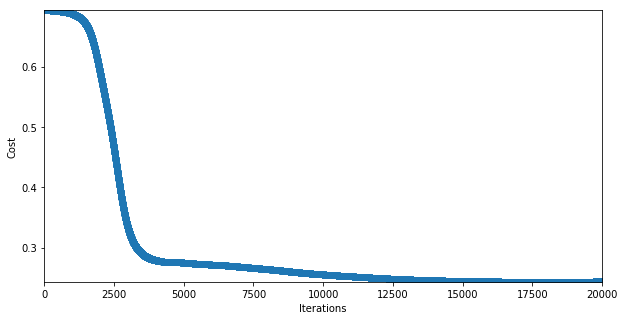

In [5]:
#plotting the cost vs iterations curve
plt.figure(figsize = (10,5))
plt.scatter(x = range(20000),y = result_dict_reg['Training cost'])
plt.ylim(min(result_dict_reg['Training cost']),max(result_dict_reg['Training cost']))
plt.xlim(0,20000)
plt.xlabel("Iterations")
plt.ylabel('Cost')
plt.show()

Clearly, our model doesn't overfit now